<a href="https://colab.research.google.com/github/cras-lab/Finance1/blob/main/Random_Predict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

랜덤한 그래프를 추정
먼저 필요한 모듈을 임포트

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


랜덤 숫자를 발생 시킨 후 훈련과 테스트로 분리

In [8]:
number = 300

np.random.seed(256)
df= np.random.rand(number, 1)

y_train, y_test = train_test_split( df, shuffle=False  )
X_train = np.arange(0, len(y_train) )
X_test = np.arange( len(y_train), len(df))

n_features = 1

train_series = y_train.reshape( (len(y_train), n_features))
test_series = y_test.reshape( (len(y_test), n_features))

from keras.preprocessing.sequence import TimeseriesGenerator
look_back = 20

train_generator = TimeseriesGenerator( train_series, train_series,
                                      length=look_back,
                                      batch_size = 10)


test_generator = TimeseriesGenerator(test_series, test_series,
                                     length= look_back,
                                     batch_size=10)

그래프 모양 보기

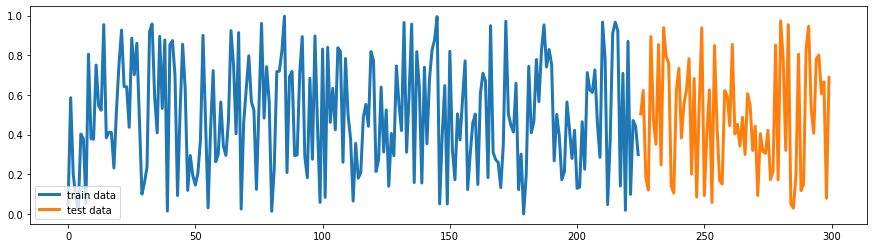

In [9]:
fig, ax = plt.subplots( 1,1, figsize=(15,4))
ax.plot( X_train, y_train, lw=3, label="train data")
ax.plot(X_test, y_test, lw=3, label="test data")
ax.legend( loc="lower left")
plt.show()

LSTM 임포트 하기

In [10]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

신경망 설계

In [14]:
n_neurons = 64 # 뉴런 개수
n_features = 1
model = Sequential()
model.add( LSTM( n_neurons, input_shape=(look_back, n_features)))
model.add( Dense(1))
model.compile( optimizer='adam', loss='mse')

적합화 한 다음 예측을 수행

In [18]:

model.fit( train_generator, epochs=50, verbose=0)

test_prediction = model.predict( test_generator )

6/6 [==============================] - 0s 5ms/step


결과를 그래프로 도식화

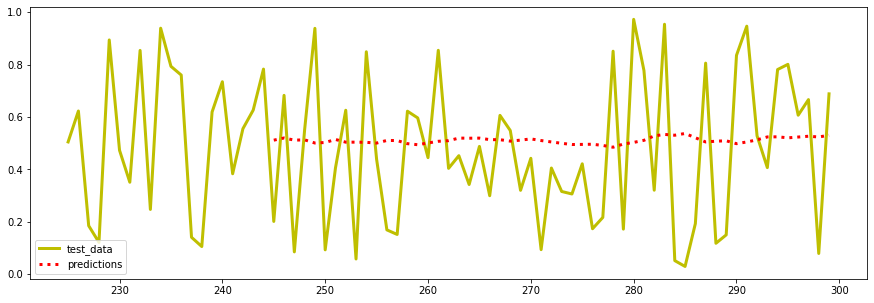

In [19]:

x= np.arange( len(df) - len(test_prediction ), len(df) )
fig, ax= plt.subplots( 1,1, figsize=(15,5))
ax.plot( X_test, y_test, lw=3, c='y', label='test_data')
ax.plot( x, test_prediction,lw=3, c='r', linestyle=':', label='predictions')
ax.legend( loc='lower left')
plt.show()